# Assignment 3 / Classification / Bank Analysis

Nama : Wilda Amrul Munafiah

Program : Python for Data Science

Kode Peserta : PYTN-KS16-021


Dataset diperoleh dari UCI machine learning melalui link berikut : https://archive.ics.uci.edu/dataset/222/bank+marketing

Key 
- Logistic Regression
- K-Nearest neighbors
- SVM
- Decission Tree
- Random forest
- Naive Bayes
- Confusion matrix
- Visualization
 


## Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Metrics
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, confusion_matrix, ConfusionMatrixDisplay

# Cross Validation
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning : Grid Search
from sklearn.model_selection import GridSearchCV

## Gathering Data

In [2]:
df=pd.read_csv('bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Assesing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
print('jumlah duplikat:', df.duplicated().sum())

jumlah duplikat: 12


In [6]:
df.shape

(41188, 21)

In [7]:
df.index

RangeIndex(start=0, stop=41188, step=1)

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Cleaning Data

In [10]:
#Mengatasi duplicate data
df.drop_duplicates(inplace=True)
print('jumlah duplikat:', df.duplicated().sum())

jumlah duplikat: 0


In [11]:
#Menghilangkan kolom yang tidak digunakan
df=df.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','day_of_week'], axis=1)

In [12]:
#rename pada kolom y (Status customer yaitu menggunakan deposit atau tidak)
df.rename(columns={'y':'status'}, inplace=True)

In [13]:
#Mengkonversi tipe data object - categorical
categorical = ['age',               
                'job',              
                'marital',           
                'education',         
                'default',           
                'housing',         
                'loan',              
                'contact',        
                'month',
                'poutcome',
                'status']

for col in categorical: 
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        41176 non-null  category
 1   job        41176 non-null  category
 2   marital    41176 non-null  category
 3   education  41176 non-null  category
 4   default    41176 non-null  category
 5   housing    41176 non-null  category
 6   loan       41176 non-null  category
 7   contact    41176 non-null  category
 8   month      41176 non-null  category
 9   duration   41176 non-null  int64   
 10  campaign   41176 non-null  int64   
 11  pdays      41176 non-null  int64   
 12  previous   41176 non-null  int64   
 13  poutcome   41176 non-null  category
 14  status     41176 non-null  category
dtypes: category(11), int64(4)
memory usage: 2.0 MB


## Visualization & Analysis Data

## Exploratory Data Analysis (EDA) of Dataset

<Axes: xlabel='job', ylabel='count'>

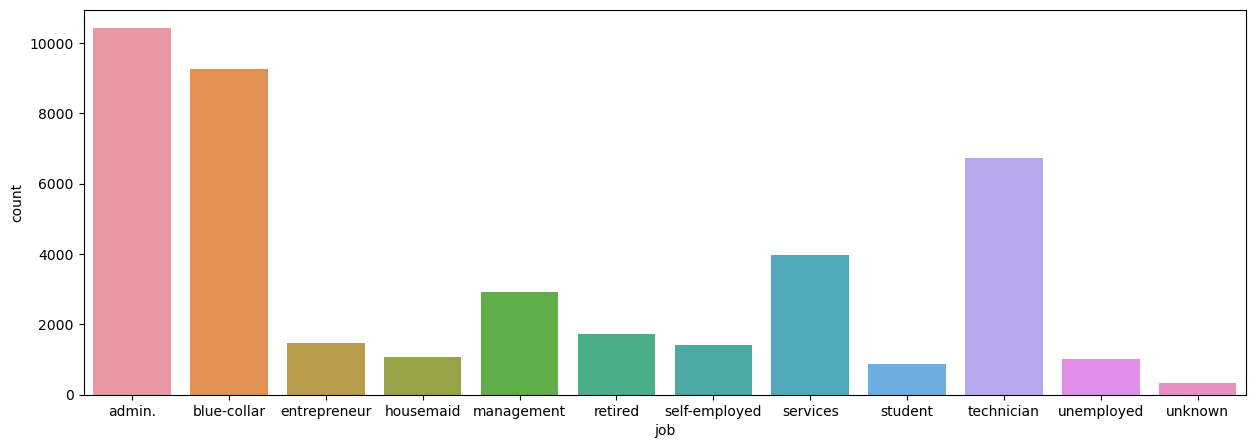

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['job'])

<Axes: xlabel='job', ylabel='count'>

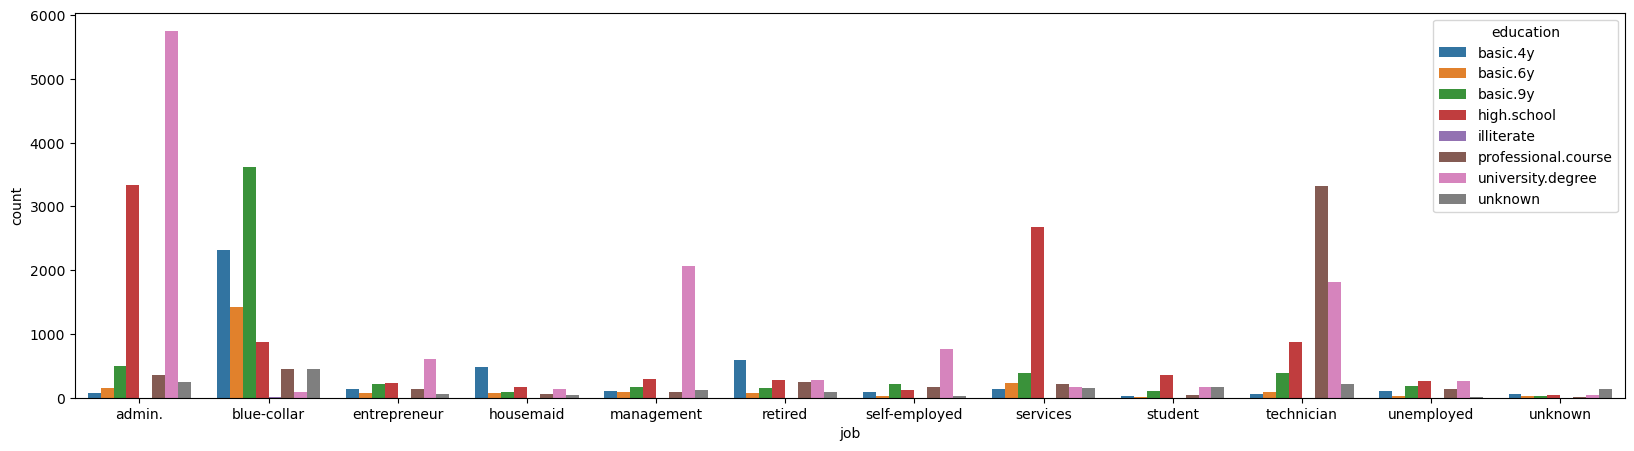

In [15]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='job', hue='education')

<Axes: xlabel='job', ylabel='count'>

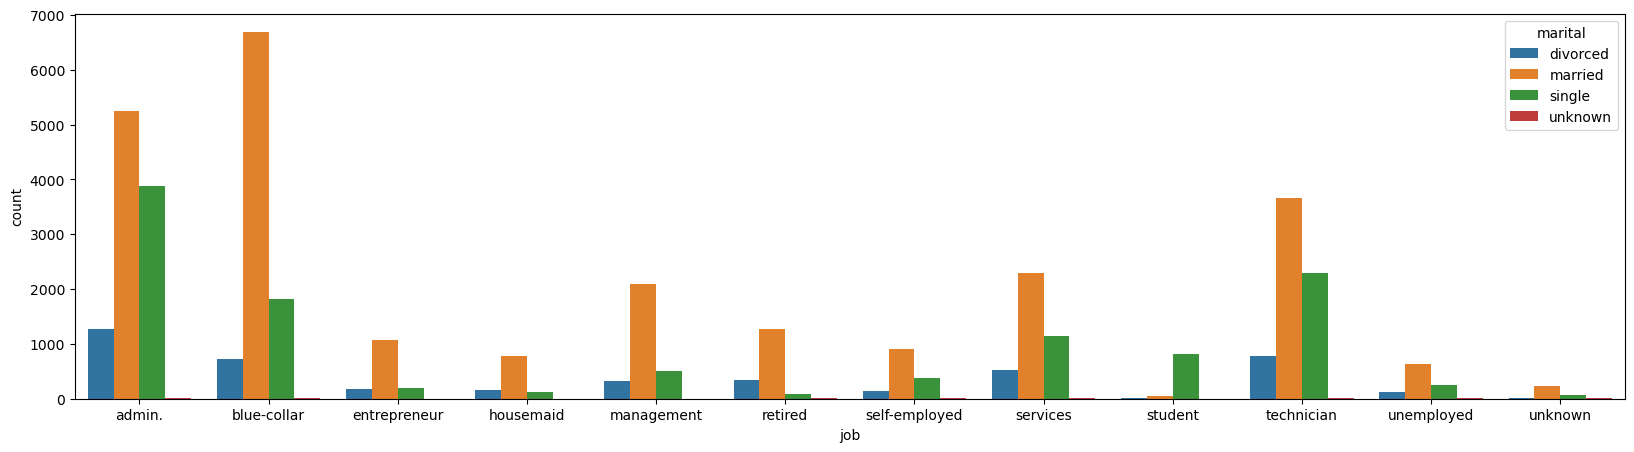

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='job', hue='marital')

<Axes: xlabel='job', ylabel='count'>

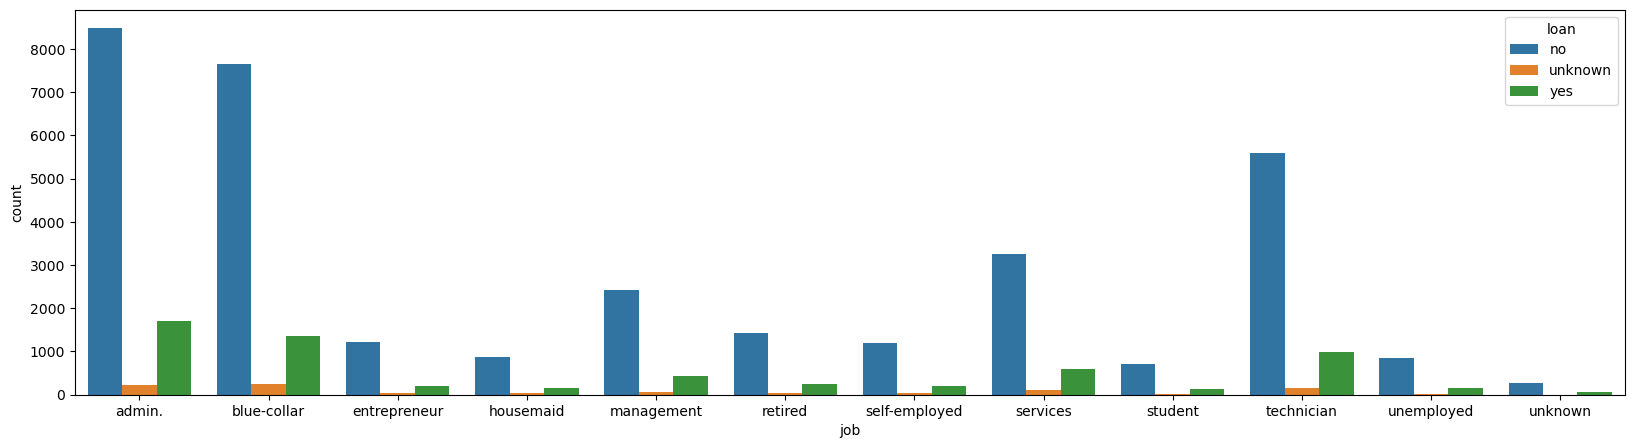

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='job', hue='loan')

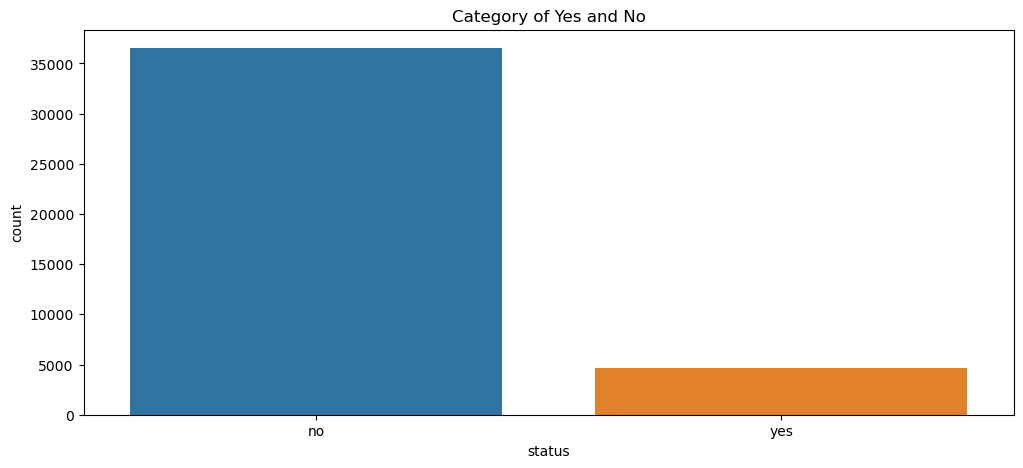

In [18]:
plt.figure(figsize=(12,5))
colors=['BurlyWood','DarkMagenta']
sns.countplot(x='status',data=df)
plt.title("Category of Yes and No")
plt.show()


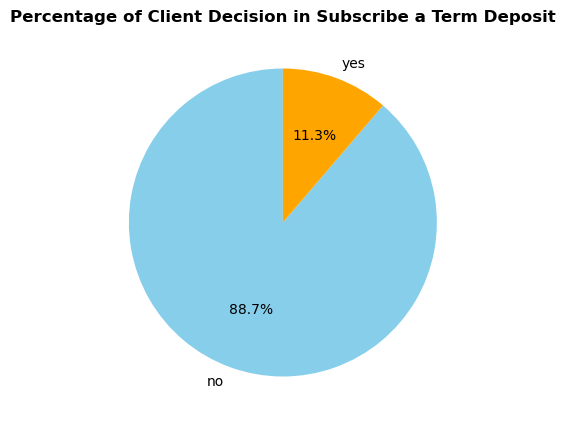

In [19]:
df_status =df['status'].value_counts()
labels =df['status'].unique()

plt.figure(figsize=(8,5))
colors=['SkyBlue','orange']
font = {'weight': 'bold','size': 12}
ax = plt.axes()
plt.title('Percentage of Client Decision in Subscribe a Term Deposit', fontdict=font)
ab = plt.pie(df_status, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

plt.show()

In [20]:
# Cek unique value pada kolom kategorik
print ('Job unique :')
print (df['job'].unique())
print ('***')
print ('Marital unique :')
print (df['marital'].unique())
print ('***')
print ('Education unique :')
print (df['education'].unique())
print ('***')
print ('Default unique :')
print (df['default'].unique())
print ('***')
print ('Housing unique :')
print (df['housing'].unique())
print ('***')
print ('Loan unique :')
print (df['loan'].unique())
print ('***')
print ('Contact unique :')
print (df['contact'].unique())
print ('***')
print ('Month unique :')
print (df['month'].unique())
print ('***')
print ('poutcome unique :')
print (df['poutcome'].unique())
print ('***')

Job unique :
['housemaid', 'services', 'admin.', 'blue-collar', 'technician', ..., 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']
***
Marital unique :
['married', 'single', 'divorced', 'unknown']
Categories (4, object): ['divorced', 'married', 'single', 'unknown']
***
Education unique :
['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
Categories (8, object): ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']
***
Default unique :
['no', 'unknown', 'yes']
Categories (3, object): ['no', 'unknown', 'yes']
***
Housing unique :
['no', 'yes', 'unknown']
Categories (3, object): ['no', 'unknown', 'yes']
***
Loan unique :
['no', 'yes', 'unknown']
Categories (3, object): ['no', 'unknown', 'ye

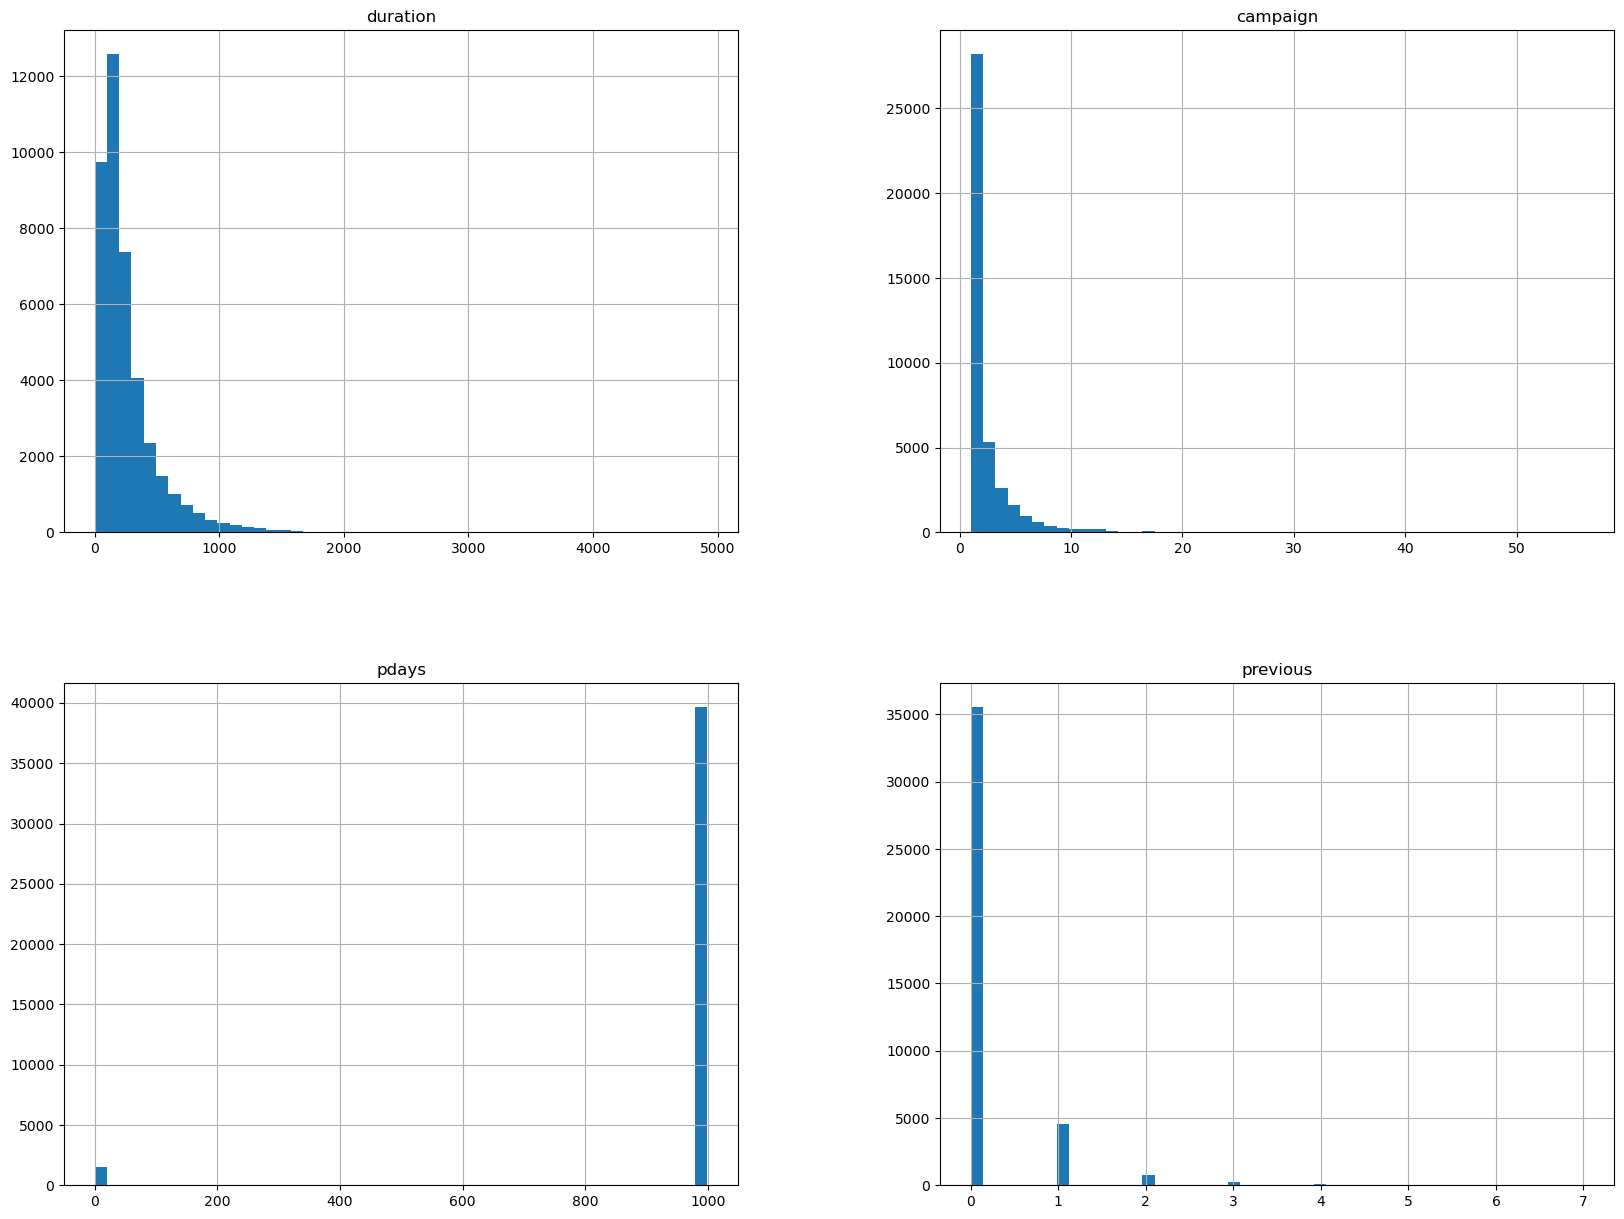

In [21]:
# Visualisasi persebaran data setiap columns
%matplotlib inline
import matplotlib.pyplot as plt
df.select_dtypes(include=np.number).hist(bins=50, figsize=(20,15))

plt.show()

## Correlation

Korelasi bertujuan untuk melihat hubungan antara kolom yang satu dengan lainnya dalam dataset

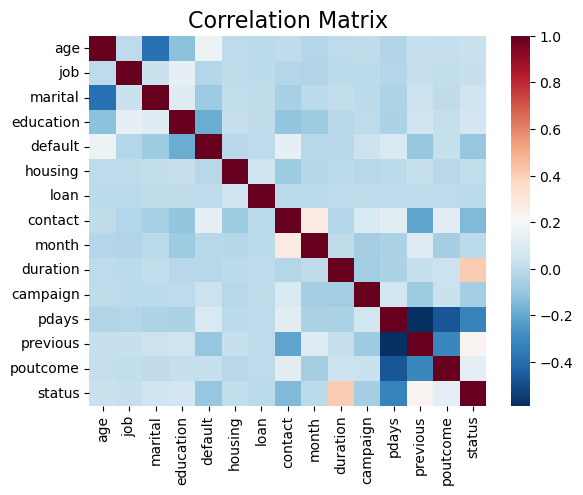

<Figure size 2000x2000 with 0 Axes>

In [22]:

col_list = df.columns[df.dtypes == 'category'].to_list()
for col in col_list:
    df[col] = preprocessing.LabelEncoder().fit_transform(df[col])

x = df.iloc[:, 0:16]
y = df.iloc[:, -1]

corrmat = df.corr()
sns.heatmap(df[corrmat.index].corr(),cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.figure(figsize=(20, 20))
plt.show()

## Feature Engineering

#### 1. Data Inference

In [23]:
#Mengambil data inference dari datset
df_inf=df.sample(20, random_state=19)

#menghilangkan inference dari dataset
df_train_test = df.drop(df_inf.index)
df_train_test

# Reset Index 
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,status
0,33,9,0,6,1,0,0,0,1,114,2,999,0,1,0
1,32,3,0,0,1,2,0,0,3,129,1,999,0,1,0
2,27,1,1,1,0,2,2,0,7,119,2,999,1,0,0
3,30,6,1,6,0,2,0,0,1,28,13,999,0,1,0
4,29,0,2,6,0,0,0,0,6,70,1,999,0,1,0
5,22,0,1,5,0,2,0,1,6,292,7,999,0,1,0
6,24,1,1,2,0,2,0,0,3,473,1,999,0,1,0
7,18,1,1,5,0,2,0,0,7,172,2,999,1,0,0
8,18,1,1,2,0,0,0,1,4,388,12,999,0,1,0
9,26,0,1,3,0,2,0,0,6,76,4,3,1,2,0


In [24]:
# Memisahkan Data Feature dan Data Target
# Feature=X
# Target=Y

X=df_train_test.drop('status', axis=1)
Y=df_train_test['status']

In [25]:
# Set Data Training dan Data Target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
print('Y_train Size  : ', Y_train.shape)
print('Y_test Size  : ', Y_test.shape)

Train Size :  (32924, 14)
Test Size  :  (8232, 14)
Y_train Size  :  (32924,)
Y_test Size  :  (8232,)


In [26]:
#Memisahkan Data Numerical dan Kategorikal untuk Data Train dan Data Test
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns= X_train.select_dtypes(include=['object']).columns.tolist()

In [27]:
#Memisahkan Data Train dan Data Test berdasarkan tipe data
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]


In [28]:
# Cek missing value untuk Data Train dan Data Test
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())
print(Y_train.isnull().sum().sum())
print(Y_test.isnull().sum().sum())
print('total missing values = ', X_train.isnull().sum().sum() + X_test.isnull().sum().sum() + Y_train.isnull().sum().sum())


0
0
0
0
total missing values =  0


In [29]:
#Cek Skewness
skew1 = []
for i in num_columns:
    skew1.append(abs(X_train[i].skew()))

# Visualisasi ke data frame
df_skew1 = pd.DataFrame({'Kolom':num_columns, 'Skewness_abs':skew1})
df_skew1['normal'] = df_skew1.Skewness_abs.apply(lambda x: True if x<=0.5 else False)
df_skew1


,Kolom,Skewness_abs,normal
0,age,0.780525,False
1,job,0.447363,True
2,marital,0.057598,True
3,education,0.237815,True
4,default,1.429681,False
5,housing,0.143704,True
6,loan,1.795012,False
7,contact,0.563341,False
8,month,0.302276,True
9,duration,3.315717,False


Seluruh kolom numerik terdistribusi skewed

In [30]:
# Cek Persentasi untuk kolom yg terdistribusi skewed
percent_outliers2 = []
num = 3
for i in [ 'duration','campaign','pdays','previous']:
    q1 = np.quantile(X_train[i], 0.25)
    q3 = np.quantile(X_train[i], 0.75)
    iqr = q3 - q1
    upper1 = q3 + num*iqr
    lower1 = q1 - num*iqr
    percent = len(X_train[(X_train[i]>upper1)|(X_train[i]<lower1)])*100/len(X_train)
    percent_outliers2.append(percent)

# Visualisasi ke Data Frame
# Visualisasi ke Data Frame
pd.DataFrame({'Kolom':['duration','campaign','pdays','previous'], 'persentasi_outlier':percent_outliers2})

,Kolom,persentasi_outlier
0,duration,2.590815
1,campaign,2.657636
2,pdays,3.647795
3,previous,13.752885


- jumlah outlier pada semua kolom cukup besar, dan outlier tertinggi berada pada kolom previous

In [31]:
# Outlier pada kolom previous
num = 3
q1 = np.quantile(X_train['previous'], 0.25)
q3 = np.quantile(X_train['previous'], 0.75)
iqr = q3 - q1
upper1 = q3 + num*iqr
lower1 = q1 - num*iqr
X_train[(X_train['previous']>upper1)|(X_train['previous']<lower1)]

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
27327,33,4,1,5,0,2,0,0,7,381,1,999,1,0
32491,42,0,1,6,0,2,0,0,6,324,2,999,1,0
39103,49,5,1,5,0,0,2,0,5,525,1,21,2,0
27558,40,6,1,6,0,2,0,0,7,208,3,999,1,0
35628,24,1,1,2,0,2,2,0,6,105,1,999,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29682,2,8,2,7,0,2,0,0,0,205,1,999,1,0
34848,37,5,0,6,0,2,0,0,6,778,5,999,1,0
31044,21,1,2,0,0,0,0,0,6,207,1,999,1,0
33174,26,0,2,6,0,2,0,0,6,305,1,999,1,0


# Modeling

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Logistic Regression


In [33]:
# model algoritma logistic regression
model = LogisticRegression()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)
     

C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# Melihat accuracy Logistic regression
print('Accuracy Score:',accuracy_score(y_test, pred_test),"\n")
print('Classfication Report :\n',classification_report(y_test, pred_test))

Accuracy Score: 0.9840524568930624 

Classfication Report :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     10919
           1       0.97      0.89      0.93      1434

    accuracy                           0.98     12353
   macro avg       0.98      0.94      0.96     12353
weighted avg       0.98      0.98      0.98     12353



In [35]:
# Implementasi confusion matrix
matrix=confusion_matrix(y_test, pred_test)
print('hasil confusion matriks:\n',matrix,'\n')

hasil confusion matriks:
 [[10878    41]
 [  156  1278]] 



## K-Nearest Neighbors

In [36]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)
knn_test=model_knn.predict(x_test)

In [37]:
# Melihat accuracy K-Nearest Neighbors
print('Accuracy Score:',accuracy_score(y_test, knn_test),"\n")
print('Classfication Report :\n',classification_report(y_test, knn_test))

Accuracy Score: 0.897190965757306 

Classfication Report :
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     10919
           1       0.59      0.36      0.45      1434

    accuracy                           0.90     12353
   macro avg       0.76      0.66      0.70     12353
weighted avg       0.88      0.90      0.89     12353



In [38]:
# Implementasi confusion matrix
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")

Confusion Matrix :
 [[10878    41]
 [  156  1278]] 



## SVM (Super Vector Machine )

In [39]:
# Model Algoritma Super Vector Machine (SVM)
model_svm = svm.SVC()
model_svm.fit(x_train, y_train)
svm_test=model_svm.predict(x_test)

In [40]:
# Melihat accuracy Super Vector Machine (SVM)
print('Accuracy Score:',accuracy_score(y_test, svm_test),"\n")
print('Classfication Report :\n',classification_report(y_test, svm_test))

Accuracy Score: 0.9018052294989072 

Classfication Report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     10919
           1       0.69      0.28      0.40      1434

    accuracy                           0.90     12353
   macro avg       0.80      0.63      0.67     12353
weighted avg       0.89      0.90      0.88     12353



In [41]:
# Implementasi confusion matrix
matrix=confusion_matrix(y_test, svm_test)
print("Confusion Matrix :\n",matrix,"\n")

Confusion Matrix :
 [[10744   175]
 [ 1038   396]] 



## Decision Tree

In [42]:
# Model Algoritma Decision Tree
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train, y_train)
DT_test=model_DT.predict(x_test)

In [43]:
# Melihat accuracy Decision Tree
print('Accuracy Score:',accuracy_score(y_test, DT_test),"\n")
print('Classfication Report :\n',classification_report(y_test, DT_test))

Accuracy Score: 1.0 

Classfication Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10919
           1       1.00      1.00      1.00      1434

    accuracy                           1.00     12353
   macro avg       1.00      1.00      1.00     12353
weighted avg       1.00      1.00      1.00     12353



In [44]:
# Implementasi confusion matrix
matrix=confusion_matrix(y_test, DT_test)
print("Confusion Matrix :\n",matrix,"\n")

Confusion Matrix :
 [[10919     0]
 [    0  1434]] 



## Random Forest

In [45]:
# Model Algoritma Random Forest
model_RF = RandomForestClassifier()
model_RF.fit(x_train, y_train)
RF_test=model.predict(x_test)

In [46]:
# Melihat accuracy random Forest
print('Accuracy Score:',accuracy_score(y_test, RF_test),"\n")
print('Classfication Report :\n',classification_report(y_test, RF_test))

Accuracy Score: 0.9840524568930624 

Classfication Report :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     10919
           1       0.97      0.89      0.93      1434

    accuracy                           0.98     12353
   macro avg       0.98      0.94      0.96     12353
weighted avg       0.98      0.98      0.98     12353



In [47]:
# Implementasi confusion matrix
matrix=confusion_matrix(y_test, RF_test)
print("Confusion Matrix :\n",matrix,"\n")

Confusion Matrix :
 [[10878    41]
 [  156  1278]] 



## Naive Bayes

In [48]:
# Model Algoritma Naive Bayes
model_NB = GaussianNB()
model_NB.fit(x_train, y_train)
NB_test=model_NB.predict(x_test)

In [49]:
# Melihat accuracy Naive Bayes
print('Accuracy Score:',accuracy_score(y_test, NB_test),"\n")
print('Classfication Report :\n',classification_report(y_test, NB_test))

Accuracy Score: 1.0 

Classfication Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10919
           1       1.00      1.00      1.00      1434

    accuracy                           1.00     12353
   macro avg       1.00      1.00      1.00     12353
weighted avg       1.00      1.00      1.00     12353



In [50]:
# Implementasi confusion matrix
matrix=confusion_matrix(y_test, NB_test)
print("Confusion Matrix :\n",matrix,"\n")

Confusion Matrix :
 [[10919     0]
 [    0  1434]] 



##  Algorithm Analysis

In [51]:
# Hasil accuracy dari setiap Algoritma
print('- Logistic Regression            :', accuracy_score(y_test, pred_test))
print('- K-Nearest Neighbors (KNN)      :', accuracy_score(y_test, knn_test))
print('- Support Vector Machine (SVM)   :', accuracy_score(y_test, svm_test))
print('- Decision Tree                  :', accuracy_score(y_test, DT_test))
print('- Random Forest                  :', accuracy_score(y_test, RF_test))
print('- Naive Bayes                    :', accuracy_score(y_test, NB_test))

- Logistic Regression            : 0.9840524568930624
- K-Nearest Neighbors (KNN)      : 0.897190965757306
- Support Vector Machine (SVM)   : 0.9018052294989072
- Decision Tree                  : 1.0
- Random Forest                  : 0.9840524568930624
- Naive Bayes                    : 1.0


Diperoleh hasil akurasi dari semua algoritma dan diperoleh Algoritma Decision Tree dan Naive Bayes dengan Nilai akurasi paling tinggi yaitu mencapai 1,0

### Kesimpulan

Bardasarkan perhitungan serta permodelan yang telah dilakukan, tingkat nilai akurasi terbaik yaitu dengan menggunakan Algoritma Decision Tree dan Naive Bayes. Tingkat nilai akurasi terendah dengan menggunakan algoritma K-Nearest Neighbors (KNN) .